In [74]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

# Statistical tests
In this notebook, we will perform various statistical tests on data from INEGI

We start by loading our data into a dataframe

In [1]:
df <- read.csv(file="pasajeros_metrocdmx.csv")

df2 <- df[c(1,4,5,6)]

names(df2) <- c("Period", "Km travelled (thousands)", "Passengers Transported (millions)", "Energy consumed (thousands of KWH)")

require(xtable)

print(xtable(head(df2)),include.rownames=FALSE,)

In [2]:
head(df)

,Periodo,Longitud.en.servicio..km...a,Trenes.en.servicio..b,Kilómetros.recorridos......Miles.de.kilómetros.,Pasajeros.transportados......Millones.de.pasajeros...c,Energía.eléctrica.consumida......Miles.de.KWH...d
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018,,,,,
2,Enero,226,275,3816.458,129.101237,89340.534
3,Febrero,226,275,3389.202,124.688815,80122.836
4,Marzo,226,273,3688.762,131.279527,89370.534
5,Abril,226,273,3646.12,132.842715,84142.336
6,Mayo,226,274,3768,135.992545,89340.534


We extract the number of passengers (```passng```) transported by month (in millions), and separate them in two vectors (```passng18```, ```passng19```) for each year

In [3]:
passng <- df$Pasajeros.transportados

In [4]:
passng <- passng[c(seq(2, 13,1), seq(15, 26, 1))]

In [6]:
passng <- as.numeric(passng)

In [7]:
passng18 <- passng[seq(1, 12, 1)]

In [8]:
passng19 <- passng[seq(13, 24, 1)]

Additionally, the kilometers travelled (in thousands) and energy consumed (in thousands of KWH) for each month are obtained

In [9]:
km <- df[,4]

In [10]:
km <- as.numeric(km[c(seq(2, 13,1), seq(15, 26, 1))])

In [11]:
kwh <- df[,6]

In [12]:
kwh <- kwh[c(seq(2, 13,1), seq(15, 26, 1))]

In [13]:
kwh <- as.numeric(kwh)

## Shapiro test
Some of the following tests assume data comes from a normal distribution, so we first perform a shapiro test. If a $p$-value $\geq 0.05$ is obtained, we **do not reject the null hypothesis** that the sample tested is normally distributed.

In [15]:
shapiro.test(passng)


	Shapiro-Wilk normality test

data:  passng
W = 0.94795, p-value = 0.2445


In [16]:
shapiro.test(passng18)


	Shapiro-Wilk normality test

data:  passng18
W = 0.92669, p-value = 0.3463


In [17]:
shapiro.test(passng19)


	Shapiro-Wilk normality test

data:  passng19
W = 0.9716, p-value = 0.9268


In [18]:
shapiro.test(km)


	Shapiro-Wilk normality test

data:  km
W = 0.96269, p-value = 0.4949


In [19]:
shapiro.test(kwh)


	Shapiro-Wilk normality test

data:  kwh
W = 0.93263, p-value = 0.1116


## One Sample t-Test

Normal distribution assumed

$H_0:$ True mean equals parameter ```mu```

$H_1: $ True mean does not equal parameter ```mu```

In [22]:
mean(passng)

[1] 132.7765

In [75]:
t.test(passng, mu = 100)


	One Sample t-test

data:  passng
t = 26.513, df = 23, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
 130.2191 135.3338
sample estimates:
mean of x 
 132.7765 


A $p$-value $< 0.05$ is obtained, so we reject the null-hypothesis. 

## Wilcoxon Signed Rank Test

Normal distribution **not** assumed

$H_0:$ True mean equals parameter ```mu```

$H_1: $ True mean does not equal parameter ```mu```

In [76]:
wilcox.test(passng, mu=100, conf.inf=TRUE)


	Wilcoxon signed rank exact test

data:  passng
V = 300, p-value = 1.192e-07
alternative hypothesis: true location is not equal to 100


A $p$-value $< 0.05$ is obtained, so we reject the null-hypothesis. 

## Wilcoxon Rank Sum Test and Two-Sample t-Test

Wilcoxon Rank Sum Test does not assume a normal distribution

$H_0 : \mu_1 - \mu_2 = 0$

$H_1 : \mu_1 - \mu_2 > 0$

In [25]:
wilcox.test(passng18, passng19, alternative = "g")


	Wilcoxon rank sum exact test

data:  passng18 and passng19
W = 68, p-value = 0.6006
alternative hypothesis: true location shift is greater than 0


Since $p > .05$, we cannot reject $H_0$, and conclude the vectors have same mean.
*******************

Two Sample t-Test assumes a normal distribution.

$H_0 : \mu_1 - \mu_2 = 0$

$H_1 : \mu_1 - \mu_2 \neq 0$

In [26]:
t.test(passng18, y=passng19)


	Welch Two Sample t-test

data:  passng18 and passng19
t = -0.087937, df = 21.716, p-value = 0.9307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.468207  5.023664
sample estimates:
mean of x mean of y 
 132.6653  132.8876 


Since $p > .05$, we cannot reject $H_0$, and conclude the vectors have same mean.

## Kolmogorov Smirnov Test

$H_0: $ Samples are drawn from the same distribution


In [27]:
ks.test(passng18, passng19)


	Two-sample Kolmogorov-Smirnov test

data:  passng18 and passng19
D = 0.16667, p-value = 0.9985
alternative hypothesis: two-sided


Since $p \geq 0.05$, null hypothesis is not rejected. We conclude samples come from same distribution

## Fisher's F-Test

$H_0: $ Ratio of variance is 1 ($\frac{\mathrm{Var}(x)}{ \mathrm{Var}(y) } = 1$)

In [28]:
var.test(passng, km)


	F test to compare two variances

data:  passng and km
F = 0.0015576, num df = 23, denom df = 23, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0006738075 0.0036006134
sample estimates:
ratio of variances 
       0.001557601 


Since $p = 2.2 \times 10^{-16} < 0.05$, we reject the null hypothesis, concluding data has different variance

## Chi Squared Test

In [91]:
df2 <- data.frame(km, kwh)

df2$cat_x <- (df2$km < median(km))

df2$cat_y <- (df2$kwh < median(kwh))

chisq.test(table(df2$cat_x, df2$cat_y), correct = FALSE)  


	Pearson's Chi-squared test

data:  table(df2$cat_x, df2$cat_y)
X-squared = 1.5105, df = 1, p-value = 0.2191


In [77]:
df3 <- data.frame(km, passng)

In [79]:
df3$cat_x <- (df3$km < median(km))

In [80]:
df3$cat_y <- (df3$passng < median(passng))

In [81]:
chisq.test(table(df3$cat_x, df3$cat_y), correct=FALSE)


	Pearson's Chi-squared test

data:  table(df3$cat_x, df3$cat_y)
X-squared = 2.6667, df = 1, p-value = 0.1025


## Correlation

$H_0: $ Correlation is equal to zero

In [56]:
cor(km, passng)

[1] 0.5766491

In [35]:
cor.test(km, passng)


	Pearson's product-moment correlation

data:  km and passng
t = 3.3106, df = 22, p-value = 0.003181
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2257709 0.7950927
sample estimates:
      cor 
0.5766491 


Since $p = 0.003 < 0.05$, we reject the null-hypothesis, and accept the alternative: true correlation is not equal to zero.

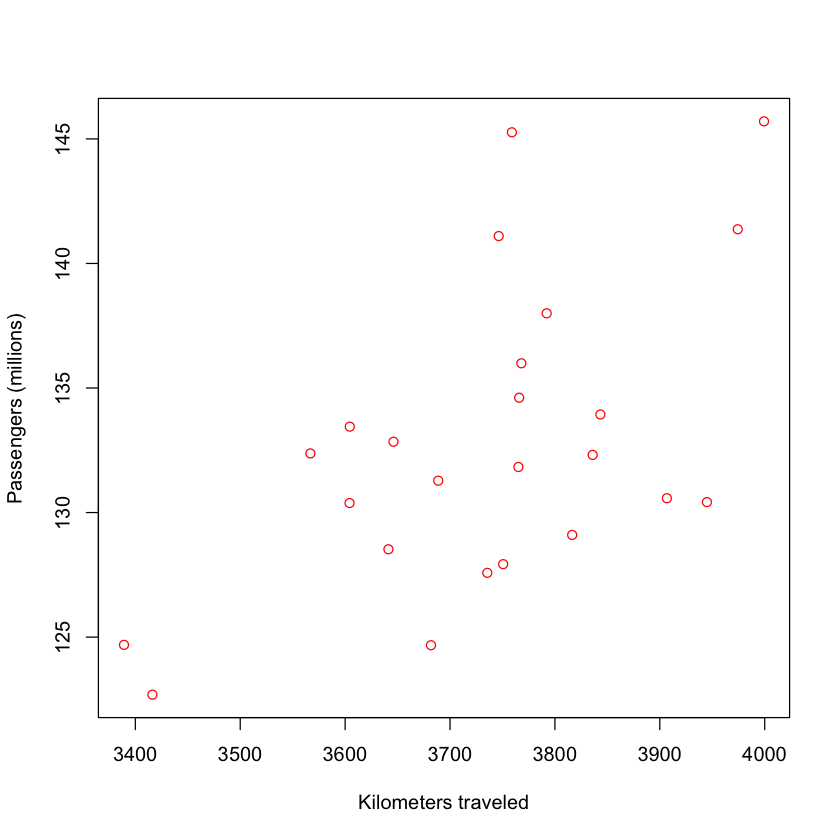

In [93]:
plot(x=km, y=passng, col="red", ylab="Passengers (millions)", xlab="Kilometers traveled")

In [94]:
png(filename="correlation_km_passng.png", height=2000, width=2000, res=400)
plot(x=km, y=passng, col="red", ylab="Passengers (millions)", xlab="Kilometers traveled")
dev.off()

pdf 
  2